In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import models,layers


import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
dftrain_raw = pd.read_csv('./data/titanic/train.csv')

In [3]:
dftest_raw = pd.read_csv('./data/titanic/test.csv')

In [4]:
dftrain_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


In [5]:
dftest_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
1,405,0,3,"Oreskovic, Miss. Marija",female,20.00,0,0,315096,8.6625,NaN,S
2,635,0,3,"Skoog, Miss. Mabel",female,9.00,3,2,347088,27.9000,NaN,S
3,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C
4,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C


In [6]:
dftrain_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            566 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          168 non-null object
Embarked       710 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.8+ KB


In [7]:
survived_count = dftrain_raw['Survived'].value_counts()

In [8]:
survived_count.index
survived_count.values

array([433, 279])

<BarContainer object of 2 artists>

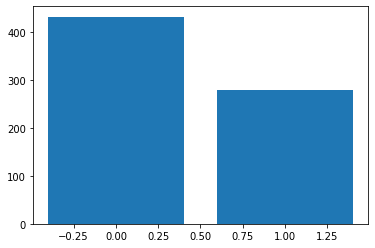

In [9]:
plt.bar(survived_count.index, height=survived_count.values, width=.8)

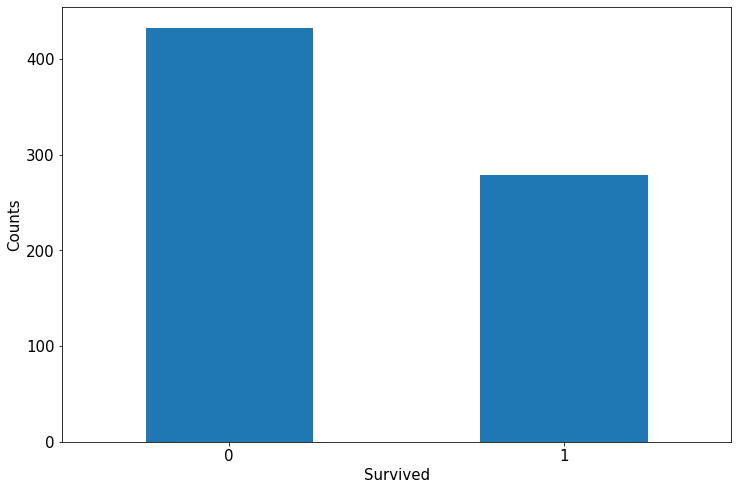

In [10]:
# ax 
ax = dftrain_raw['Survived'].value_counts().plot(kind = 'bar',
     figsize = (12,8),fontsize=15,rot = 0)
ax.set_ylabel('Counts',fontsize = 15)
ax.set_xlabel('Survived',fontsize = 15)
plt.show()

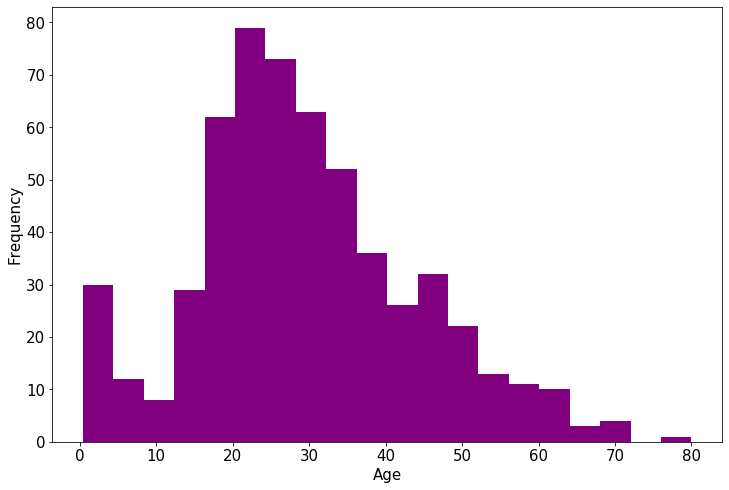

In [11]:
ax = dftrain_raw['Age'].plot(kind = 'hist',bins = 20,color= 'purple',
                    figsize = (12,8),fontsize=15)

ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

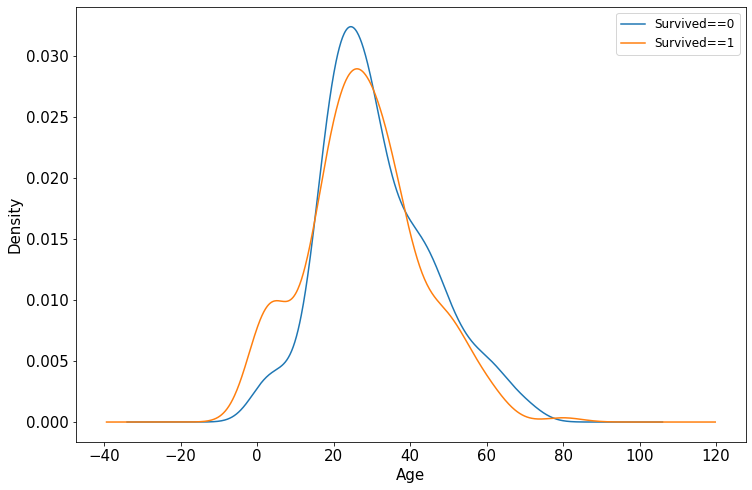

In [12]:
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
dftrain_raw.query('Survived == 1')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
ax.legend(['Survived==0','Survived==1'],fontsize = 12)
ax.set_ylabel('Density',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

In [13]:
age_0 = dftrain_raw.query('Survived == 0')['Age']
age_1 = dftrain_raw.query('Survived == 1')['Age']

In [14]:
dftrain_raw.shape

(712, 12)

In [15]:
def preprocessing(dfdata):

    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)

    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)

In [16]:
x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values


In [17]:
x_train.head()

,Pclass_1,Pclass_2,Pclass_3,female,male,Age,Age_null,SibSp,Parch,Fare,Cabin_null,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,0,0,1,55.0,0,0,0,30.5000,0,0,0,1,0
1,1,0,0,1,0,49.0,0,1,0,76.7292,0,1,0,0,0
2,0,1,0,1,0,36.0,0,0,0,13.0000,1,0,0,1,0
3,0,1,0,0,1,19.0,0,0,0,13.0000,1,0,0,1,0
4,0,0,1,0,1,14.0,0,4,1,39.6875,1,0,0,1,0


In [18]:
x_test = preprocessing(dftest_raw)
y_test = dftest_raw['Survived'].values

In [19]:
print("x_train.shape =", x_train.shape , 'y_train.shape=', y_train.shape)
print("x_test.shape =", x_test.shape, 'y_test.shape=', y_test.shape )

x_train.shape = (712, 15) y_train.shape= (712,)
x_test.shape = (179, 15) y_test.shape= (179,)


In [20]:
tf.keras.backend.clear_session()

In [21]:
model = models.Sequential()

In [22]:
model.add(layer=layers.Dense(20, activation='relu', input_shape=(15, )))

In [23]:
model.add(layer=layers.Dense(10, activation='relu'))

In [24]:
model.add(layer=layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 二分类问题选择二元交叉熵损失
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

In [27]:
history = model.fit(x_train, y_train, batch_size=12, epochs=30, validation_split=.2)

Train on 569 samples, validate on 143 samples
Epoch 1/30
569/569 [==============================] - 1s 2ms/sample - loss: 0.6497 - AUC: 0.6656 - val_loss: 0.6272 - val_AUC: 0.6710
Epoch 2/30
569/569 [==============================] - 0s 207us/sample - loss: 0.6161 - AUC: 0.7000 - val_loss: 0.6066 - val_AUC: 0.6915
Epoch 3/30
569/569 [==============================] - 0s 219us/sample - loss: 0.6163 - AUC: 0.7190 - val_loss: 0.5980 - val_AUC: 0.7105
Epoch 4/30
569/569 [==============================] - 0s 223us/sample - loss: 0.5747 - AUC: 0.7600 - val_loss: 0.6109 - val_AUC: 0.7275
Epoch 5/30
569/569 [==============================] - 0s 240us/sample - loss: 0.5680 - AUC: 0.7683 - val_loss: 0.5872 - val_AUC: 0.7339
Epoch 6/30
569/569 [==============================] - 0s 241us/sample - loss: 0.5599 - AUC: 0.7955 - val_loss: 0.5874 - val_AUC: 0.7361
Epoch 7/30
569/569 [==============================] - 0s 234us/sample - loss: 0.5293 - AUC: 0.8100 - val_loss: 0.5922 - val_AUC: 0.7487
Epoc

In [28]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

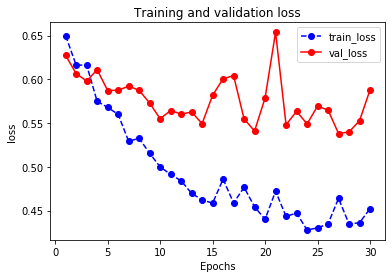

In [29]:
plot_metric(history,"loss")

In [43]:
history.history['loss']
history.history['val_loss']

[0.6271966003871464,
 0.6065748238063359,
 0.5980255824702603,
 0.6109090330717447,
 0.5871929263735151,
 0.5874482699624308,
 0.5922247413155082,
 0.5874064716842625,
 0.5728971487158662,
 0.5549011434708442,
 0.5643490640433518,
 0.5602988584058268,
 0.5625536546006903,
 0.5493905477590494,
 0.5817255719558342,
 0.6007074574073712,
 0.604153300498749,
 0.5546522169680028,
 0.540958048163594,
 0.578680247276813,
 0.653762105044785,
 0.5479778426510471,
 0.5634580933964336,
 0.5490268206262922,
 0.5693540331367013,
 0.5648333634529914,
 0.5380100020161875,
 0.5398433762830455,
 0.5527325576835579,
 0.5879085220240213]

In [44]:
history.history['AUC']

[0.6656135,
 0.70000523,
 0.7190279,
 0.760012,
 0.7683401,
 0.79548293,
 0.80998075,
 0.80525434,
 0.826195,
 0.83787125,
 0.84172,
 0.8431243,
 0.85355884,
 0.8600796,
 0.8562113,
 0.8380142,
 0.8557693,
 0.8491444,
 0.85628927,
 0.86711395,
 0.8457443,
 0.85998213,
 0.86329114,
 0.8707416,
 0.87279606,
 0.867205,
 0.84755164,
 0.86806977,
 0.86778367,
 0.86352533]

In [46]:
history.history['loss']

[0.6497162161476793,
 0.6161110765695152,
 0.616323479659109,
 0.5747275884494002,
 0.5679701803438693,
 0.5598867868706715,
 0.5292689266020468,
 0.532573720273318,
 0.5154675718770085,
 0.5000135723652027,
 0.4913174645133932,
 0.48409829976164814,
 0.46969959108397913,
 0.46226553034908113,
 0.4585421732733245,
 0.4859076021321,
 0.4587517035945019,
 0.47660740974288834,
 0.45425889105495126,
 0.4400892107893168,
 0.4721764126016721,
 0.44335243792022677,
 0.4472065788999802,
 0.4279399875597292,
 0.43022802917316216,
 0.43488228946976587,
 0.4639156860395978,
 0.4346804597884783,
 0.4361937690284005,
 0.4521709401913393]

In [47]:
history

In [48]:
model.evaluate(x = x_test,y = y_test)

179/179 [==============================] - 0s 52us/sample - loss: 0.4398 - AUC: 0.8764


[0.43980807382301246, 0.8764367]

In [49]:
# model.evaluate(x=, y=)

In [50]:
model.predict(x_test[:10])

array([[0.39718553],
       [0.6863997 ],
       [0.56081784],
       [0.9986777 ],
       [0.73677844],
       [0.84387755],
       [0.09500894],
       [0.9292532 ],
       [0.7146923 ],
       [0.12087251]], dtype=float32)

In [51]:
model.predict_classes(x_test[0:10])

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0]], dtype=int32)

In [52]:
model.predict_proba(x_test[:10])

array([[0.39718553],
       [0.6863997 ],
       [0.56081784],
       [0.9986777 ],
       [0.73677844],
       [0.84387755],
       [0.09500894],
       [0.9292532 ],
       [0.7146923 ],
       [0.12087251]], dtype=float32)

In [54]:
# save model
model.save('./models/keras.model_1.h5')

In [55]:
del model

In [63]:
model = models.load_model('./models/keras.model_1.h5')

In [57]:
model.predict_proba(x_test[:10])

array([[0.39718553],
       [0.6863997 ],
       [0.56081784],
       [0.9986777 ],
       [0.73677844],
       [0.84387755],
       [0.09500894],
       [0.9292532 ],
       [0.7146923 ],
       [0.12087251]], dtype=float32)

In [67]:
json_model = model.to_json()

In [65]:
model_from_json = models.model_from_json(model_json)

In [66]:
model.save_weights('./models/keras_model_weight1.h5')

In [69]:
model_json_1 = models.model_from_json(json_model)

In [70]:
model_json_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

In [72]:
model_json_1.load_weights('./models/keras_model_weight1.h5')
model_json_1.evaluate(x_test, y_test)

179/179 [==============================] - 0s 64us/sample - loss: 0.4398 - AUC: 0.8764


[0.43980807382301246, 0.8764367]

In [ ]:
model.save('./models/save_model.ckpt', save_format='tf')

In [81]:
model.save('./models/tf_model_savedmodel', save_format="tf")
print('export saved model.')

model_loaded = tf.keras.models.load_model('./models/tf_model_savedmodel')
model_loaded.evaluate(x_test,y_test)

INFO:tensorflow:Assets written to: ./models/tf_model_savedmodel/assets
export saved model.
179/179 [==============================] - 0s 1ms/sample - loss: 0.4398 - AUC: 0.8764


[0.43980807382301246, 0.8764367]